**линейный классификатор**

правило Розенблатта  

Евгений Борисов borisov.e@solarl.ru

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing   import MinMaxScaler

---

In [2]:
# загружаем даные
data = [
    np.loadtxt('../data/200_2b/points_1.txt'),
    np.loadtxt('../data/200_2b/points_2.txt')
]

In [3]:
# собираем вместе
X = np.vstack(data)

In [4]:
# метки классов
y = [ [i]*data[i].shape[0] for i in range(len(data)) ]
y = np.asarray(sum(y,[]))
#y = y*2-1

In [5]:
X.shape, y.shape

((200, 2), (200,))

In [6]:
%xdel data

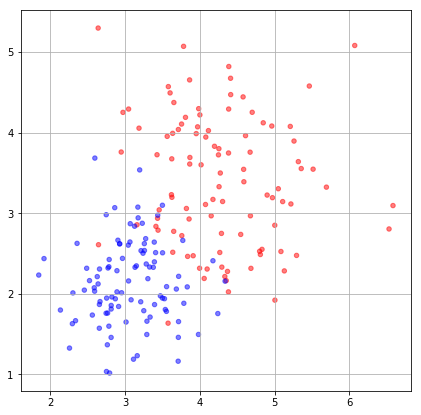

In [7]:
plt.figure(figsize=(7,7))
plt.scatter( x=X[:,0], 
             y=X[:,1], 
             c=[ 'b' if(j>0) else 'r' for j in y ], 
             s=20,
             alpha=0.5 )
plt.grid()
plt.show()

---

In [8]:
# биннаризация X
n=50
b = np.vstack([ np.linspace(X[:,j].min()-1,X[:,j].max()+1,n) for j in range(X.shape[1]) ])

Xp = np.hstack([
    np.hstack([ ( (b[j,i]<X[:,j])&(X[:,j]<b[j,i+1]) ).astype(int).reshape(X.shape[0],1) 
    for i in range(b.shape[1]-1) ])
    for j in range(X.shape[1])
])

Xp.shape

(200, 98)

---

In [9]:
# from time import time
# def get_seed(): t = time() ; return int(((t%1)/(t//1))*1e11)
# np.random.seed(get_seed())

In [10]:
# инициализация параметров
W = np.random.normal(loc=0.0, scale=0.1, size=Xp.shape[1])
W 

array([-1.04308864e-01, -5.53436190e-02,  4.32352253e-02, -1.60700997e-02,
       -2.53528417e-01,  8.70947801e-02, -6.51799285e-02,  5.94067816e-02,
        5.71358356e-02, -8.39981164e-03,  3.34380876e-02,  1.16372861e-01,
       -1.58234150e-01, -1.61609364e-02,  5.31441306e-02,  1.19001203e-02,
       -1.60511151e-01, -4.24485388e-02, -4.69107981e-02,  1.10070174e-01,
        1.41029928e-01,  2.40630440e-02,  2.41518155e-01, -5.67780018e-02,
        1.75985911e-02,  3.64279314e-02,  6.34774739e-02, -3.05937700e-03,
        8.25459826e-02, -1.12649869e-01,  1.49520922e-01, -6.26691407e-02,
       -2.18971764e-02,  1.02060263e-01,  4.99572678e-02,  1.38937964e-01,
        1.38669604e-01, -8.64917771e-02,  2.72103689e-04, -1.14965732e-01,
        1.39974992e-01,  1.53129867e-01,  1.09627134e-01, -5.14453319e-02,
       -8.72005166e-03,  1.75380578e-02, -3.56012547e-02,  7.16944610e-02,
        5.60400026e-02,  2.65823972e-02,  1.66983652e-02, -3.43726400e-02,
       -4.56240098e-03, -

In [11]:
def loss(x,w,y): return -x.dot(w)*y    

In [12]:
MAX_ITER = 20 # максимальное число циклов обучения
MIN_ERROR = -Xp.shape[0]*0.99 # порог ошибки (количество ошибок)

a=0.7 # скорость обучения

er_hist = [] # история ошибки

In [13]:
# метод стохастического градиентного спуска (SGD)
stop=False
for i in range(MAX_ITER):
    if stop: break
    for j in np.random.permutation(Xp.shape[0]):
        xj,yj = Xp[j,:],y[j]
        r = (xj.dot(W)>0.5).astype(int) # выход
        
        W = W - a * xj.T.dot(r-y[j])
        
        er_hist.append( loss(Xp,W,y).sum() ) # значение ф-ции потери     

        if er_hist[-1] < MIN_ERROR: # проверяем достижение порога
            print( 'error bound on epoch %i step %i: %f'%(i,j,er_hist[-1]) )
            stop=True
            break


error bound on epoch 13 step 112: -198.193685


In [14]:
print(W)
print(len(er_hist),er_hist[-1])

[-1.04308864e-01 -5.53436190e-02  4.32352253e-02 -1.60700997e-02
 -2.53528417e-01  8.70947801e-02 -6.51799285e-02  7.59406782e-01
  5.71358356e-02 -8.39981164e-03  1.43343809e+00  8.16372861e-01
  1.24176585e+00  6.83839064e-01  1.45314413e+00  7.11900120e-01
  1.93948885e+00  2.05755146e+00  6.53089202e-01  1.10070174e-01
  8.41029928e-01  2.40630440e-02 -4.58481845e-01 -2.15677800e+00
 -6.82401409e-01 -1.36357207e+00  6.34774739e-02 -1.40305938e+00
 -6.17454017e-01 -1.12649869e-01 -1.25047908e+00 -7.62669141e-01
 -7.21897176e-01  1.02060263e-01  4.99572678e-02  1.38937964e-01
  1.38669604e-01 -8.64917771e-02  2.72103689e-04 -1.14965732e-01
  1.39974992e-01 -5.46870133e-01  1.09627134e-01 -5.14453319e-02
 -8.72005166e-03  1.75380578e-02 -3.56012547e-02  7.16944610e-02
  5.60400026e-02  2.65823972e-02  1.66983652e-02 -3.43726400e-02
 -4.56240098e-03 -2.09198570e-01 -4.15154618e-02  8.82422008e-02
  7.24079409e-01  5.85555277e-01  6.37801632e-01  9.18245932e-01
  1.33370751e+00  7.58948

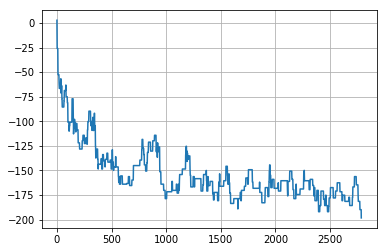

In [15]:
plt.plot(range(len(er_hist)),er_hist)
plt.grid()
plt.show()

---

In [16]:
o = Xp.dot(W)

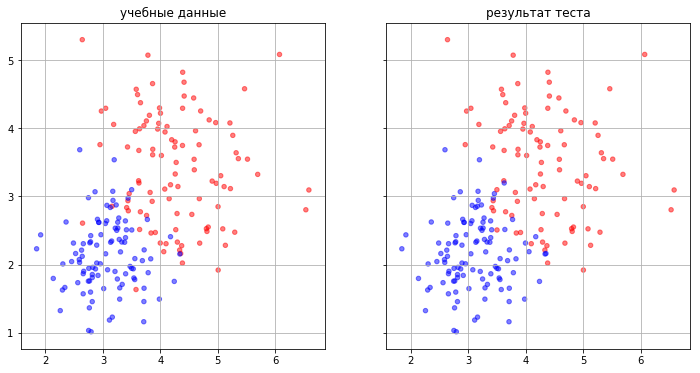

In [17]:
f, axarr = plt.subplots(1,2, sharex=True, sharey=True,figsize=(12,6),)
    
axarr[0].set_title('учебные данные')
axarr[0].scatter( x=X[:,0], 
             y=X[:,1], 
             c=[ 'b' if(j>0) else 'r' for j in y ], 
             s=20,
             alpha=0.5 )
axarr[0].grid()

axarr[1].set_title('результат теста')
axarr[1].scatter( x=X[:,0], 
             y=X[:,1], 
             c=[ 'b' if(j>0.5) else 'r' for j in o ], 
             s=20,
             alpha=0.5 )
axarr[1].grid()

plt.show()
